In [24]:
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xyz_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

In [25]:
dir_name='/home/bnorthan/Images/tnia-python-images/notebooks/segmentation/nuclei/'

input_name=dir_name+"nuclei1_out_c00_dr90_image.tif" 
input_name=dir_name+"|nuclei4_out_c90_dr10_image.tif"
input_name=dir_name+"nuclei2_out_c90_dr90_image.tif"
#decon_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei2_out_c90_dr90_image_decon.tif"
im, x_voxel_size, y_voxel_size, z_voxel_size = open_ij3D(input_name)

In [26]:
print(x_voxel_size, z_voxel_size)
print(im.shape)

0.1238060147933331 0.2
(100, 258, 258)


(65, 256, 256)
(65, 128, 128)
1.0


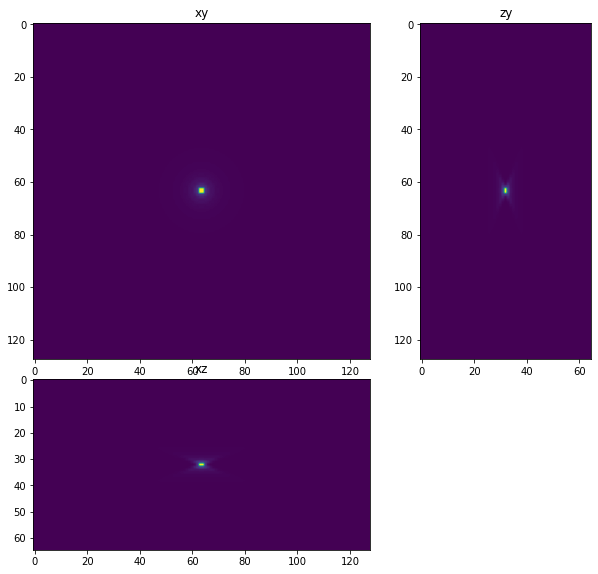

In [27]:
from skimage.io import imread

dir_name='/home/bnorthan/Images/'

abrf_psf_name = dir_name+'tnia-python-images/notebooks/deconvolution/abrf/PSF_widefield_0.75NA_1.0ri_300nm_1400nm.tif'

abrf_psf = imread(abrf_psf_name)

print(abrf_psf.shape)
abrf_psf=abrf_psf[:,64:192,64:192]
print(abrf_psf.shape)
abrf_psf=abrf_psf/abrf_psf.sum()
print(abrf_psf.sum())
fig=show_xyz_max(abrf_psf)

PSF using given parameters
0.9999998


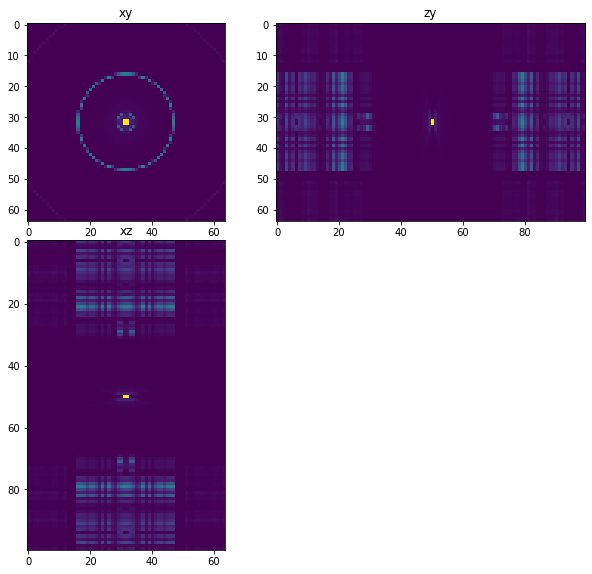

In [33]:
x_voxel_size=.3
z_voxel_size=1.4

xy_psf_dim=64
z_psf_dim=100

NA=0.8
ni=1
ns=1.5

psf = gibson_lanni_3D(NA, ni, ns, x_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, 0, 0.5)
psf = psf.astype('float32')
#psf = gibson_lanni_3D(NA, ni, ns, xy_pixel_size, xy, zv, 0, 0.65)
#plt.imshow(psf_xyz[int(size[0]/2),:,:])
print('PSF using given parameters')
print(psf.sum())
fig=show_xyz_max(psf)


PSF assuming spacing is 0.8


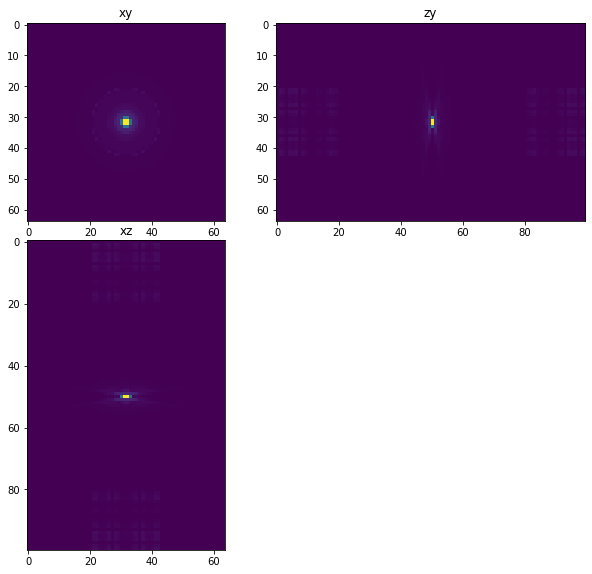

In [34]:
x_voxel_size=.12
z_voxel_size=.85

psf2 = gibson_lanni_3D(NA, ni, ns, x_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, 0, 0.45)
psf2 = psf2.astype('float32')
#psf = gibson_lanni_3D(NA, ni, ns, xy_pixel_size, xy, zv, 0, 0.65)
#plt.imshow(psf_xyz[int(size[0]/2),:,:])
print('PSF assuming spacing is 0.8')
fig=show_xyz_max(psf2)

In [35]:
from skimage.io import imsave
imsave('D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\psf.tif', psf)

<ipython-input-35-146befc954a4>:2: UserWarning: D:\images\ABRF LMRG Image Analysis Study\nuclei\psf.tif is a low contrast image
  imsave('D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\psf.tif', psf)


In [36]:
psf.dtype

dtype('float32')

In [37]:
#decon1=richardson_lucy_nc(im, psf, 200, 0)
#decon2=richardson_lucy_nc(im, psf2, 200, 0)
decon3=richardson_lucy_nc(im2, abrf_psf, 200, 0)

#decon2=richardson_lucy(im, psf, 200, 0)


get lib
unpad and return


In [38]:
im2=np.zeros_like(im)
im2=im2+100

Original Image


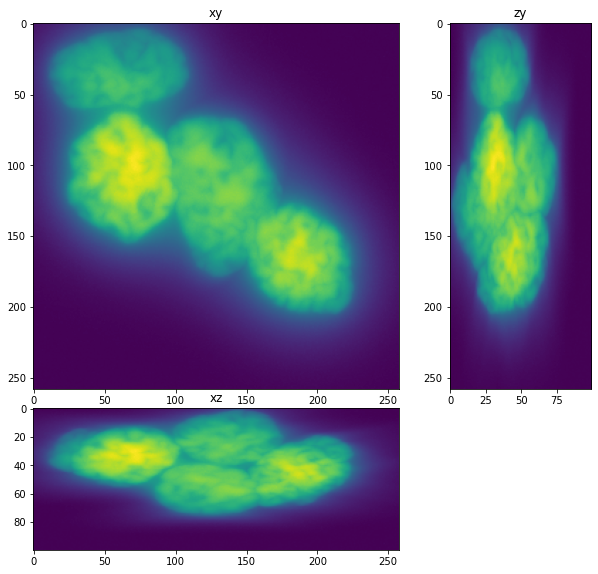

In [39]:
print('Original Image')
fig=show_xyz_max(im)

In [40]:
print('deconvolved assuming spacing is 0.8')
fig=show_xyz_max(decon1)

deconvolved assuming spacing is 0.8


NameError: name 'decon1' is not defined

25.784359 25.784359


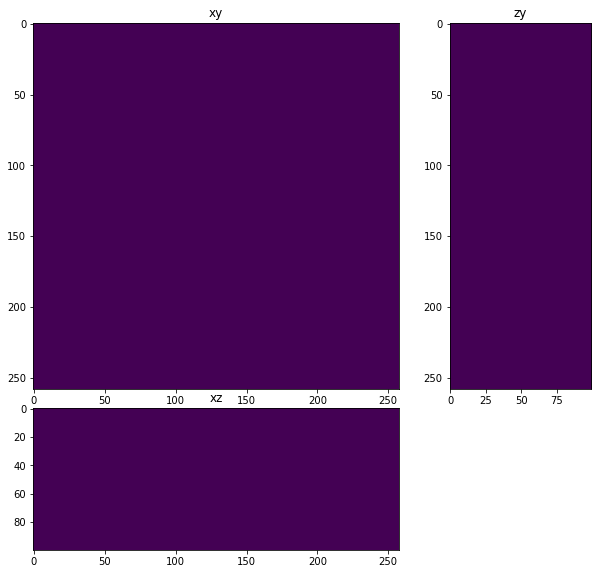

In [41]:
fig=show_xyz_max(decon3)
print(decon3.min(), decon3.max())

In [30]:
print('deconvolved assuming spacing is 0.8')
fig=show_xyz_max(decon2)

deconvolved assuming spacing is 0.8


NameError: name 'decon2' is not defined

deconvolved original parameters


C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


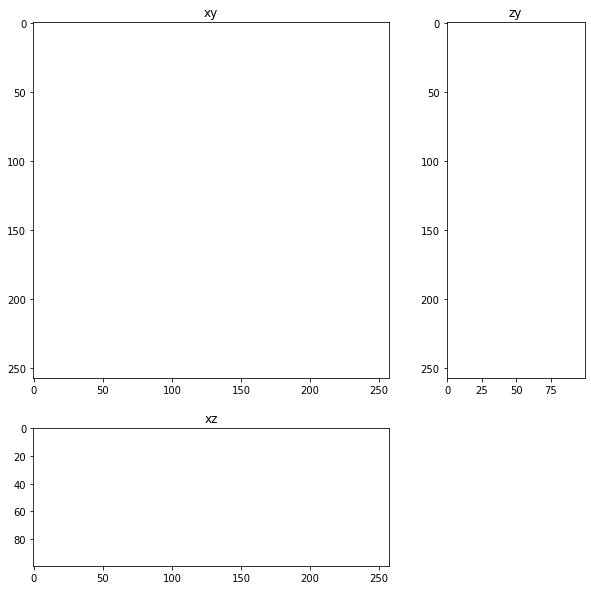

In [43]:
print('deconvolved original parameters')
fig=show_xyz_max(decon1)

In [71]:
imsave(decon_name, decon1)

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\_future.py:466: RuntimeWarning: coroutine 'get_msg' was never awaited
  if not self._shadow_sock.get(EVENTS) & POLLIN:


In [10]:
from tnia.viewing.napari_helper import show_image

In [11]:
viewer=show_image(decon1, 'deconvolved')
viewer=show_image(im, 'image', viewer=viewer)

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

IMPORTANT:
You are using QT version 5.9.7, but version 5.15.4 was also found in your environment.
This usually happens when you 'conda install' something that also depends on PyQt
*after* you have pip installed napari (such as jupyter notebook).
You will likely run into problems and should create a fresh environment.
If you want to install conda packages into the same environment as napari,
please add conda-forge to your channels: https://conda-forge.org

  warn(message=warn_message)


In [12]:
## start napari
import napari
viewer = napari.Viewer()

# show images
viewer.add_image(im, scale = [2,1,1])
#viewer.add_image(decon1, scale = [2,1,1])
viewer.add_image(decon3, scale = [2,1,1])

/home/bnorthan/anaconda3/envs/tnia_deconware/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


<Image layer 'decon3' at 0x7f083a3d9c40>

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
